In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/gdrive/MyDrive/10k.rar", outdir="/content/data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
patool: Extracting /content/gdrive/MyDrive/10k.rar ...
patool: running /usr/bin/unrar x -- /content/gdrive/MyDrive/10k.rar
patool:     with cwd='/content/data'
patool: ... /content/gdrive/MyDrive/10k.rar extracted to `/content/data'.


'/content/data'

In [1]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from glob import glob
def load_data(n):
  X = np.zeros((n, 218, 178, 3))
  names = glob('/content/data/10k/*')
  for i in range(n):
    X[i] = cv2.imread(names[i], cv2.IMREAD_COLOR)
  return X, X[:100]

In [3]:
def plot_loss(history):
    plt.subplot(2, 1, 1)
    plt.title("MAE")
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.subplot(2, 1, 2)
    plt.title("Loss MSE")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()

def upSampling():
  model = Sequential()
  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=dim))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(UpSampling2D((2, 2), interpolation='nearest'))
  model.add(Conv2D(16, (2, 2), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2), interpolation='nearest'))
  model.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(UpSampling2D((2, 2), interpolation='nearest'))
  model.add(Conv2D(3, (2, 2), activation='linear', padding='same'))
  model.summary()
  return model
  

def convT():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=dim))
  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2DTranspose(32, kernel_size=(2,2), strides=(2,2), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2DTranspose(32, kernel_size=(2,2), strides=(2,2), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2D(3, kernel_size=(3, 3), activation='linear', padding='same'))
  model.summary()
  return model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 52, 42, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 40, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 38, 8)         1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 50, 40, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 52, 42, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 54, 44, 16)       2

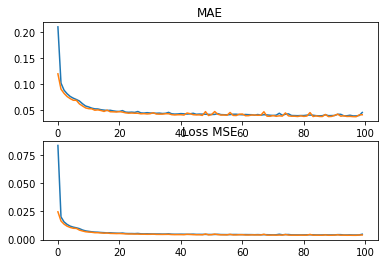

In [4]:
# Model configuration
resize_value = 4
batch_size = 32
no_epochs = 100
validation_split = 0.2

# Load Cifar dataset
# (input_train_orginal, targinput_test_orginalet_train), (input_test_orginal, target_test) = cifar100.load_data()
input_train_orginal, input_test_orginal = load_data(2000)
img_height, img_width, img_dim = input_train_orginal.shape[1], input_train_orginal.shape[2], input_train_orginal.shape[3]

# Resize data
dim = (img_height//resize_value, img_width//resize_value, img_dim)
input_train = np.zeros((input_train_orginal.shape[0], dim[0], dim[1], dim[2]))
for i in range(input_train.shape[0]):
  input_train[i] = cv2.resize(input_train_orginal[i], (dim[1], dim[0]))

input_test = np.zeros((input_test_orginal.shape[0], dim[0], dim[1], dim[2]))
for i in range(input_test.shape[0]):
  input_test[i] = cv2.resize(input_test_orginal[i], (dim[1], dim[0]))

# Reshape data
input_train = input_train.reshape(input_train.shape[0], dim[0], dim[1], dim[2])
input_test = input_test.reshape(input_test.shape[0], dim[0], dim[1], dim[2])

input_train_y = input_train_orginal.reshape(input_train_orginal.shape[0], img_height, img_width, dim[2])
input_test_y = input_test_orginal.reshape(input_test_orginal.shape[0], img_height, img_width, dim[2])

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train_y = input_train_y.astype('float32')
input_test_y = input_test_y.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

input_train_y = input_train_y / 255
input_test_y = input_test_y / 255

# Create the model
model = convT()
# model = upSampling()


# Compile and fit data
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(input_train, input_train_y,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)
plot_loss(history)

model.save_weights("/content/gdrive/MyDrive/Colab Notebooks/model.h5")

# # Generate reconstructions
# num_reconstructions = 8
# samples = input_test[:num_reconstructions]
# samples_y = input_test_y[:num_reconstructions]
# reconstructions = model.predict(samples)

# for i in np.arange(0, num_reconstructions):
#   # Get the sample and the reconstruction
#   sample = samples[i]
#   sample_y = samples_y[i]
#   reconstruction = reconstructions[i]
#   reconstruction_cv2 = cv2.resize(sample, (img_width, img_height))
#   # Matplotlib preparations
#   fig, axes = plt.subplots(1, 2)
#   # Plot sample and reconstruciton
#   plt.subplot(2, 2, 1)
#   plt.imshow(sample)
#   plt.title('Resized')
#   plt.subplot(2, 2, 2)
#   plt.imshow(sample_y)
#   plt.title('Original')
#   plt.subplot(2, 2, 3)
#   plt.imshow(reconstruction_cv2)
#   plt.title('CV2')
#   plt.subplot(2, 2, 4)
#   plt.imshow(reconstruction)
#   plt.title('Reconstruction')
#   plt.show()